In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-shopping-trends-dataset/shopping_trends.csv
/kaggle/input/customer-shopping-trends-dataset/shopping_trends_updated.csv


**Objective: Analyze customer purchase behavior and review ratings to identify factors that influence customer satisfaction and loyalty.

In [3]:
trends = pd.read_csv('/kaggle/input/customer-shopping-trends-dataset/shopping_trends_updated.csv')

Text(0.5, 1.0, 'Missing Data')

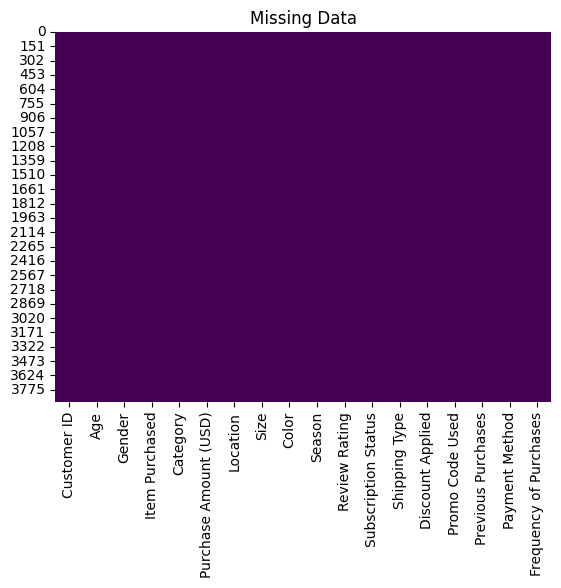

In [4]:
sns.heatmap(trends.isnull(),cmap='viridis',cbar=False)
plt.title('Missing Data')

There is no missing data in the data-set.

In [5]:
trends.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

Confirmed that there is no missing data.

In [6]:
trends.describe()
#Summary stats

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


Age Distribution: The 'Age' column appears to follow a relatively uniform distribution, with values ranging from 18 to 70 years. The mean age is approximately 44 years.

Purchase Amount: The 'Purchase Amount (USD)' column shows that the purchase amounts range from 20 to 100 USD. The mean purchase amount is approximately 59.76 USD.

Review Rating: The 'Review Rating' column indicates customer review ratings, which range from 2.5 to 5.0. The mean review rating is approximately 3.75.

Previous Purchases: The 'Previous Purchases' column suggests the number of previous purchases made by customers, ranging from 1 to 50. The mean number of previous purchases is approximately 25.35

In [7]:
trends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

There are 5 columns with numerical data-types.

Checking correlation between age and other columns.

In [8]:
trends_num = trends.select_dtypes(exclude=['object'])

selected only the numerical columns and stored in a new variable

In [9]:
trends_num.corr()['Age']

Customer ID             -0.004079
Age                      1.000000
Purchase Amount (USD)   -0.010424
Review Rating           -0.021949
Previous Purchases       0.040445
Name: Age, dtype: float64

There are no correlations with age.

Checking for other possible correlations.

In [10]:
trends_num.corr()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
Customer ID,1.000000,-0.004079,0.011048,0.001343,-0.039159
Age,-0.004079,1.000000,-0.010424,-0.021949,0.040445
Purchase Amount (USD),0.011048,-0.010424,1.000000,0.030776,0.008063
Review Rating,0.001343,-0.021949,0.030776,1.000000,0.004229
Previous Purchases,-0.039159,0.040445,0.008063,0.004229,1.000000


There are no correlations in the dataset.

Checking the frequency of ages.

<Axes: ylabel='Frequency'>

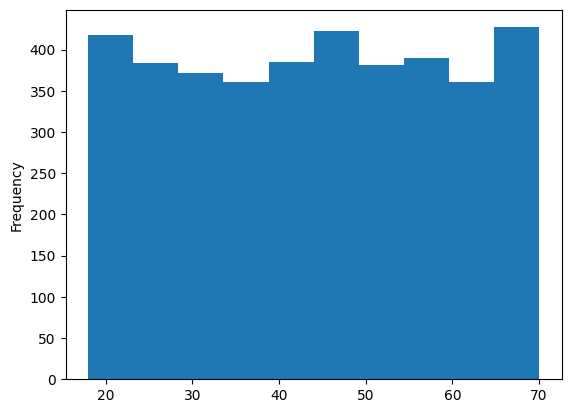

In [11]:
trends['Age'].plot.hist()

There is a uniform distribution of ages.

In [12]:
trends['Age'].value_counts().reset_index()

,Age,count
0,69,88
1,57,87
2,41,86
3,25,85
4,49,84
5,50,83
6,54,83
7,27,83
8,62,83
9,32,82


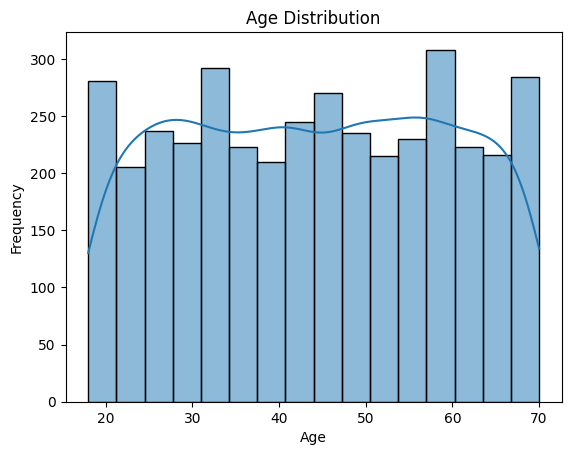

In [22]:
sns.histplot(x=trends['Age'],kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

Used seaborn to create a better visualization of the uniform age column.

Steps to Achieve the Objective:

Segmentation: Divide the customers into segments based on their purchase behavior, such as frequency of purchases and purchase amounts.

Exploratory Data Analysis (EDA): Conduct EDA to explore relationships between variables. For example, examine how purchase amounts vary with age, review ratings, or previous purchases.

Hypothesis Testing: Perform hypothesis tests to determine if there are significant differences in review ratings or purchase behavior between customer segments.

Correlation Analysis: Analyze the correlation between review ratings and other variables (e.g., age, purchase amounts) to identify factors that influence customer satisfaction.

Visualization: Create visualizations (e.g., scatter plots, bar charts) to visualize patterns and trends in the data.

Feature Engineering: If necessary, engineer new features that may provide additional insights into customer behavior or satisfaction.

Conclusion: Summarize the findings and insights obtained from the analysis. Draw conclusions about factors that impact customer satisfaction and loyalty.

STEP 1

Segmentation: Divide the customers into segments based on their purchase behavior, such as frequency of purchases and purchase amounts.

In [24]:
trends['Frequency of Purchases'].value_counts()

Frequency of Purchases
Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: count, dtype: int64

In [25]:
freq_3 = trends[trends['Frequency of Purchases']=='Every 3 Months']
freq_ann = trends[trends['Frequency of Purchases']=='Annually']
freq_quar = trends[trends['Frequency of Purchases']=='Quarterly']
freq_Mon = trends[trends['Frequency of Purchases']=='Monthly']
freq_bi_week = trends[trends['Frequency of Purchases']=='Bi-Weekly']
freq_fortn = trends[trends['Frequency of Purchases']=='Fortnightly']
freq_week = trends[trends['Frequency of Purchases']=='Weekly']

Segmented data based on frequency of purchases.

In [31]:
trends.Category.value_counts(normalize=True)*100

Category
Clothing       44.538462
Accessories    31.794872
Footwear       15.358974
Outerwear       8.307692
Name: proportion, dtype: float64

clothing and accessory categories are the most common.

In [35]:
trends.groupby('Gender')['Category'].value_counts()

Gender  Category   
Female  Clothing        556
        Accessories     392
        Footwear        199
        Outerwear       101
Male    Clothing       1181
        Accessories     848
        Footwear        400
        Outerwear       223
Name: count, dtype: int64

In [36]:
trends.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [37]:
trends.Gender.value_counts()

Gender
Male      2652
Female    1248
Name: count, dtype: int64

There are significantly more males than females. this explains the differences seen in the categories targetted by both gender. 

[freq_3,freq_ann,freq_quar,freq_Mon,freq_bi_week,freq_fortn,freq_week]

In [47]:
freq_3.Gender.value_counts()

Gender
Male      398
Female    186
Name: count, dtype: int64

In [48]:
freq_ann.Gender.value_counts()

Gender
Male      387
Female    185
Name: count, dtype: int64

In [49]:
freq_quar.Gender.value_counts()

Gender
Male      394
Female    169
Name: count, dtype: int64

In [50]:
freq_Mon.Gender.value_counts()

Gender
Male      368
Female    185
Name: count, dtype: int64

In [51]:
freq_bi_week.Gender.value_counts()

Gender
Male      359
Female    188
Name: count, dtype: int64

In [52]:
freq_fortn.Gender.value_counts()

Gender
Male      379
Female    163
Name: count, dtype: int64

In [53]:
freq_week.Gender.value_counts()

Gender
Male      367
Female    172
Name: count, dtype: int64

Nothing was gotten from checking the division of genders in the segmented frequencies.

In [54]:
freq_3.Size.value_counts()

Size
M     249
L     169
S      99
XL     67
Name: count, dtype: int64

In [56]:
freq_ann.Size.value_counts()


Size
M     264
L     146
S      92
XL     70
Name: count, dtype: int64

In [57]:
freq_quar.Size.value_counts()


Size
M     262
L     148
S      90
XL     63
Name: count, dtype: int64

In [58]:
freq_Mon.Size.value_counts()


Size
M     240
L     169
S      99
XL     45
Name: count, dtype: int64

In [59]:
freq_bi_week.Size.value_counts()


Size
M     248
L     144
S      94
XL     61
Name: count, dtype: int64

In [61]:
freq_fortn.Size.value_counts()

Size
M     238
L     142
S     102
XL     60
Name: count, dtype: int64

In [62]:
freq_week.Size.value_counts()

Size
M     254
L     135
S      87
XL     63
Name: count, dtype: int64

M,L,S,XL in that order(descending) is how sizes are ordered regardless of the category of the frequency of purchase.

In [63]:
trends.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

Frequency of Purchases
Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539

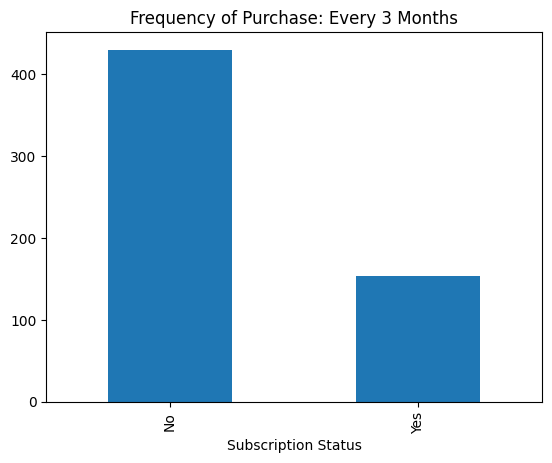

In [69]:
freq_3['Subscription Status'].value_counts().plot.bar()
plt.title('Frequency of Purchase: Every 3 Months')
plt.show()

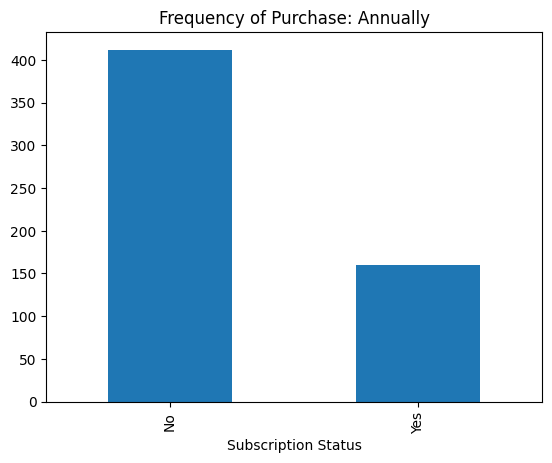

In [76]:
freq_ann['Subscription Status'].value_counts().plot.bar()
plt.title('Frequency of Purchase: Annually')
plt.show()

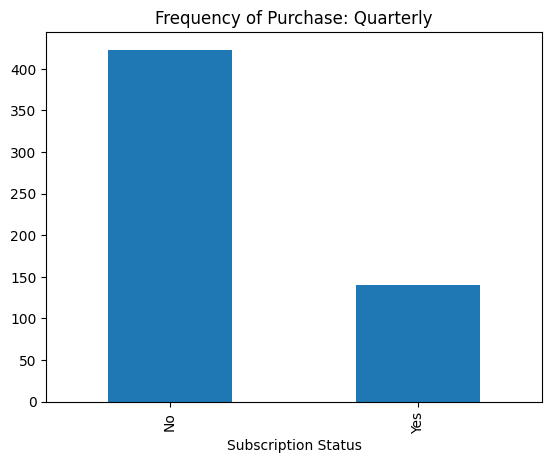

In [77]:
freq_quar['Subscription Status'].value_counts().plot.bar()
plt.title('Frequency of Purchase: Quarterly')
plt.show()

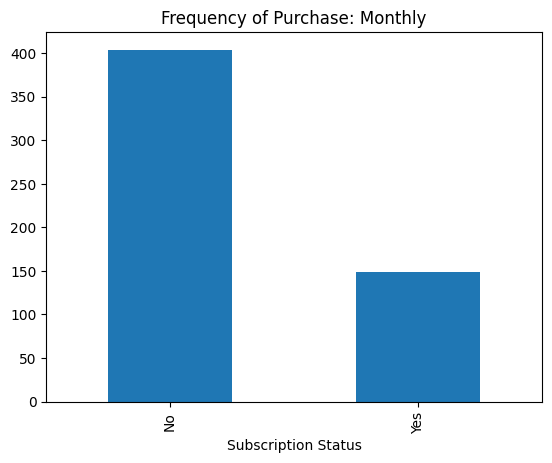

In [78]:
freq_Mon['Subscription Status'].value_counts().plot.bar()
plt.title('Frequency of Purchase: Monthly')
plt.show()

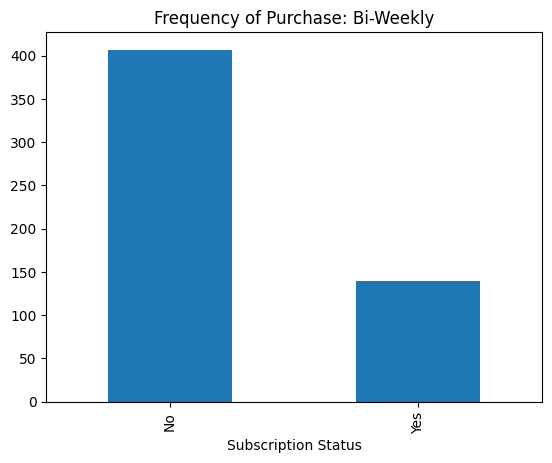

In [79]:
freq_bi_week['Subscription Status'].value_counts().plot.bar()
plt.title('Frequency of Purchase: Bi-Weekly')
plt.show()

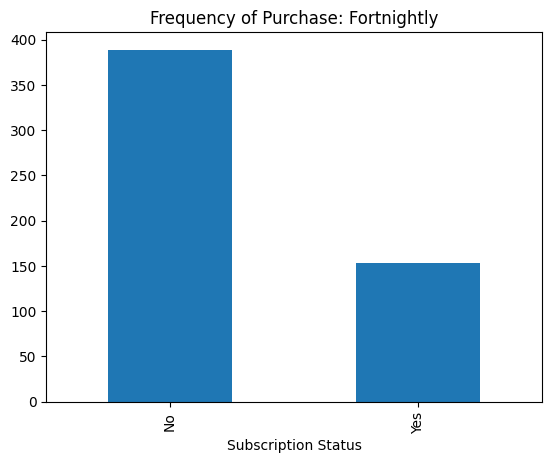

In [80]:
freq_fortn['Subscription Status'].value_counts().plot.bar()
plt.title('Frequency of Purchase: Fortnightly')
plt.show()

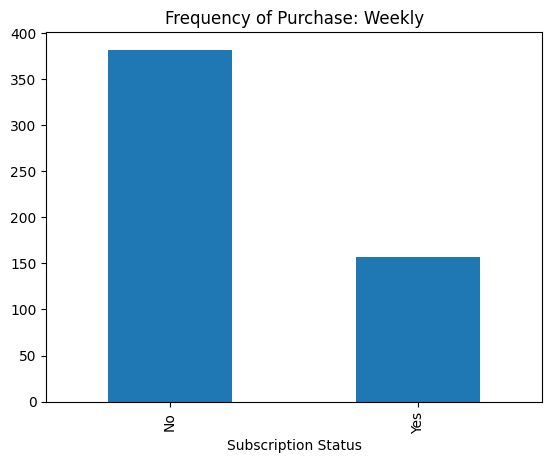

In [81]:
freq_week['Subscription Status'].value_counts().plot.bar()
plt.title('Frequency of Purchase: Weekly')
plt.show()

There aren't many people with subscriptions.

Text(0, 0.5, '')

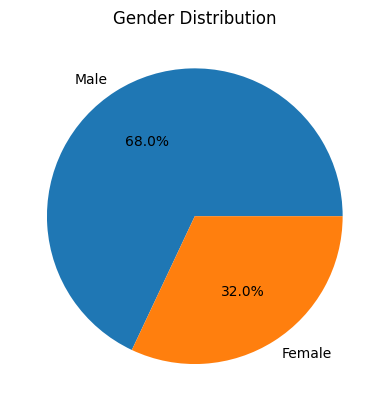

In [89]:
trends.Gender.value_counts().plot.pie(autopct='%.1f%%')
plt.title('Gender Distribution')
plt.ylabel('')

Visualizing the data

Text(0, 0.5, '')

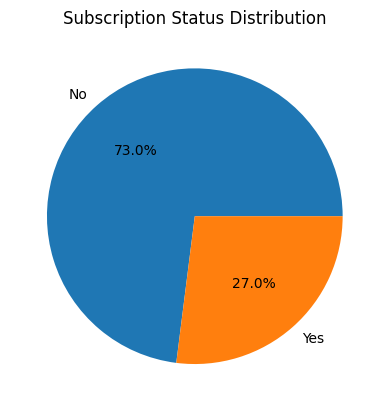

In [90]:
trends['Subscription Status'].value_counts().plot.pie(autopct='%.1f%%')
plt.title('Subscription Status Distribution')
plt.ylabel('')

The above chart shows that 73% of people dont have a subscription.

Customer Behavior Analysis 1

Analyze the behavior of customers with and without a subscription status. Are there differences in their purchase frequency, purchase amounts, or review ratings?


Text(0.5, 1.0, 'No Subscription: Review Rating')

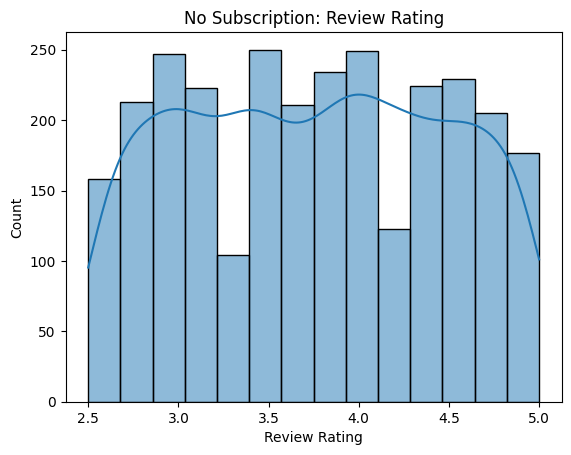

In [106]:
sns.histplot(trends[trends['Subscription Status']=='No']['Review Rating'],kde=True)
plt.title('No Subscription: Review Rating')

Text(0.5, 1.0, 'Subscription: Review Rating')

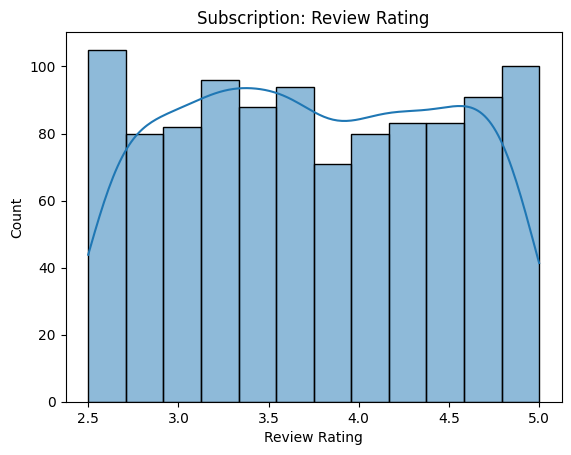

In [107]:
sns.histplot(trends[trends['Subscription Status']=='Yes']['Review Rating'],kde=True)
plt.title('Subscription: Review Rating')

The uniform graphs reveal that there isn't reasonable difference between review ratings of people with subscriptions and people without

Text(0.5, 1.0, 'No Subscription: Location')

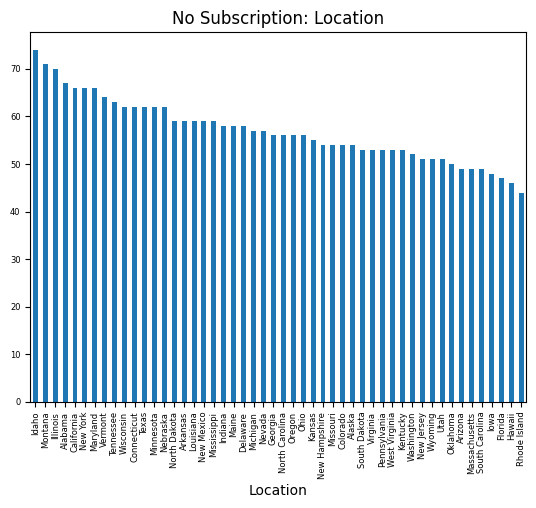

In [108]:
trends[trends['Subscription Status']=='No']['Location'].value_counts().plot.bar(fontsize=6)
plt.title('No Subscription: Location')

Text(0.5, 1.0, 'Subscription: Location')

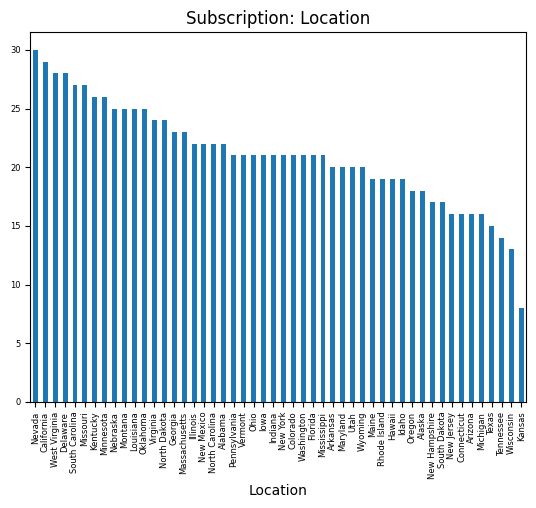

In [109]:
trends[trends['Subscription Status']=='Yes']['Location'].value_counts().plot.bar(fontsize=6)
plt.title('Subscription: Location')

Text(0.5, 1.0, 'No Subscription: Purchase Amount(USD)')

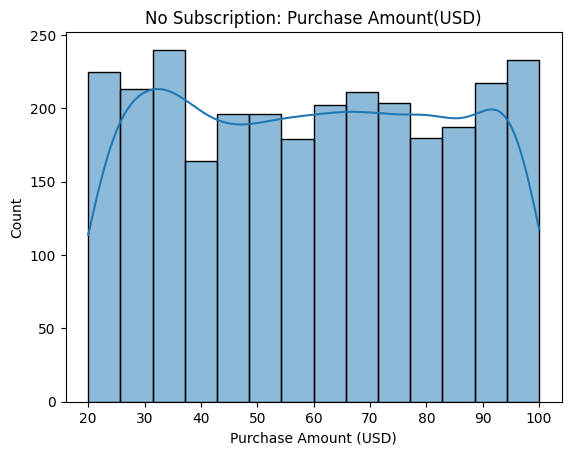

In [110]:
sns.histplot(trends[trends['Subscription Status']=='No']['Purchase Amount (USD)'],kde=True)
plt.title('No Subscription: Purchase Amount(USD)')

Text(0.5, 1.0, 'Subscription: Purchase Amount(USD)')

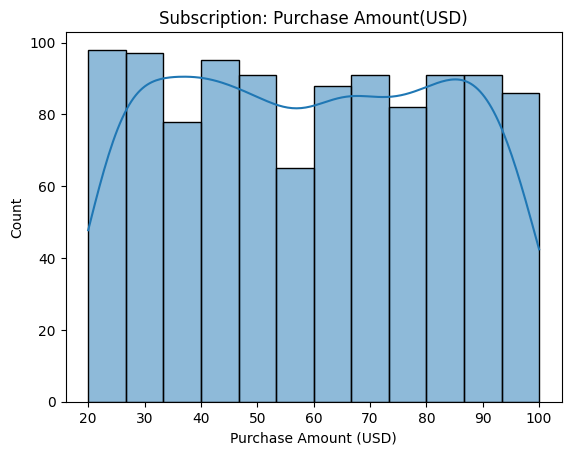

In [111]:
sns.histplot(trends[trends['Subscription Status']=='Yes']['Purchase Amount (USD)'],kde=True)
plt.title('Subscription: Purchase Amount(USD)')

Unifrom distribution of purchase amounts for both categories.

Text(0.5, 1.0, 'Subscription: Frequency of Purchases')

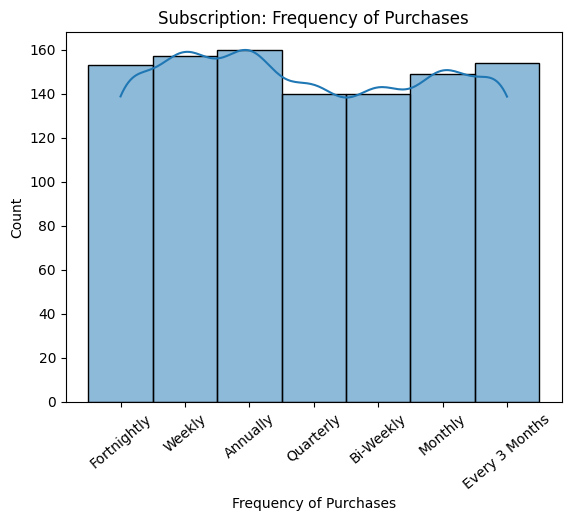

In [123]:
sns.histplot(trends[trends['Subscription Status']=='Yes']['Frequency of Purchases'],kde=True)
plt.xticks(rotation=40)
plt.title('Subscription: Frequency of Purchases')

Text(0.5, 1.0, 'No Subscription: Frequency of Purchases')

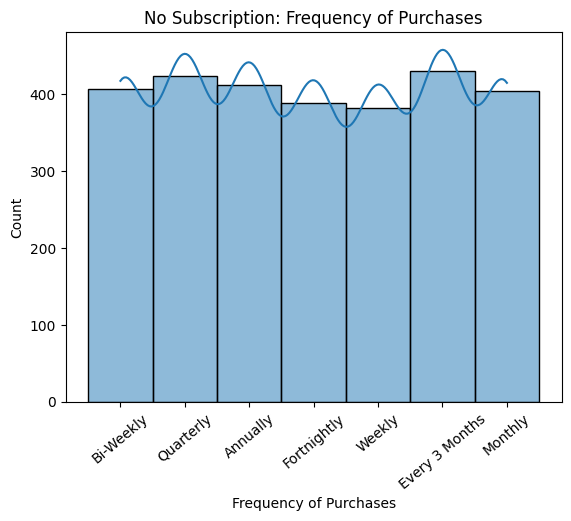

In [124]:
sns.histplot(trends[trends['Subscription Status']=='No']['Frequency of Purchases'],kde=True)
plt.xticks(rotation=40)
plt.title('No Subscription: Frequency of Purchases')

No difference between the frequency of purchases for both categories(with and without subscription)

Customer Behavior Analysis 2

Explore whether gender plays a role in customer behavior. Do male and female customers exhibit different purchase patterns or satisfaction levels?

In [115]:
trends.groupby('Gender')['Review Rating'].agg(['mean','max','min'])

,mean,max,min
Gender,,,
Female,3.741426,5.0,2.5
Male,3.753959,5.0,2.5


no relevant information retrieved from the 'review rating' column after specifying gender.

Text(0, 0.5, '')

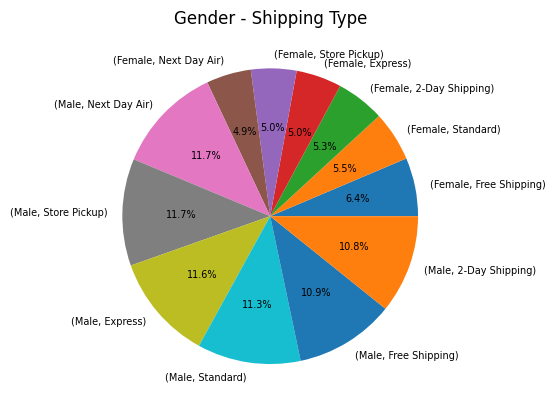

In [136]:
trends.groupby('Gender')['Shipping Type'].value_counts().plot.pie(autopct='%.1f%%',fontsize=7)
plt.title('Gender - Shipping Type')
plt.ylabel('')

Even distribution of shipping types in both genders.

Customer Satisfaction and Review Ratings:

Investigate the relationship between review ratings and other variables such as age, purchase amounts, and subscription status.

In [144]:
trends.groupby('Review Rating')['Age'].value_counts().sort_index()

Review Rating  Age
2.5            18     1
               19     2
               20     1
               21     3
               22     1
                     ..
5.0            63     2
               65     2
               68     2
               69     4
               70     2
Name: count, Length: 1290, dtype: int64

In [146]:
trends.groupby('Review Rating')['Purchase Amount (USD)'].value_counts(bins=10,normalize=True)*100

Review Rating  Purchase Amount (USD)
2.5            (88.6, 96.0]             18.181818
               (36.8, 44.2]             13.636364
               (73.8, 81.2]             12.121212
               (66.4, 73.8]             10.606061
               (29.4, 36.8]              9.090909
                                          ...    
5.0            (35.8, 43.7]              7.352941
               (43.7, 51.6]              7.352941
               (67.4, 75.3]              7.352941
               (83.2, 91.1]              7.352941
               (27.9, 35.8]              2.941176
Name: proportion, Length: 260, dtype: float64

In [148]:
trends.Age.value_counts(bins=10).sort_index()

Age
(17.947, 23.2]    418
(23.2, 28.4]      384
(28.4, 33.6]      371
(33.6, 38.8]      361
(38.8, 44.0]      436
(44.0, 49.2]      371
(49.2, 54.4]      381
(54.4, 59.6]      390
(59.6, 64.8]      361
(64.8, 70.0]      427
Name: count, dtype: int64

Segmenting by age.

In [150]:
age_bins = [0, 30, 45, 60, 100]  # Age ranges
age_labels = ['0-30', '31-45', '46-60', '61+']  # Labels for age groups

# Create a new column 'Age Group' with the age groups
trends['Age Group'] = pd.cut(trends['Age'], bins=age_bins, labels=age_labels, right=False)


In [161]:
trends[trends['Age Group']=='0-30']['Purchase Amount (USD)'].value_counts().head(10)

Purchase Amount (USD)
23    21
97    19
94    18
98    17
56    17
69    16
67    15
91    14
90    14
74    14
Name: count, dtype: int64

In [162]:
trends[trends['Age Group']=='31-45']['Purchase Amount (USD)'].value_counts().head(10)

Purchase Amount (USD)
66    22
90    22
32    21
28    20
82    19
45    19
36    19
51    18
77    18
25    18
Name: count, dtype: int64

In [163]:
trends[trends['Age Group']=='46-60']['Purchase Amount (USD)'].value_counts().head(10)

Purchase Amount (USD)
96    21
51    21
36    20
32    20
68    20
33    20
26    19
25    19
71    18
88    18
Name: count, dtype: int64

In [164]:
trends[trends['Age Group']=='61+']['Purchase Amount (USD)'].value_counts().head(10)

Purchase Amount (USD)
29    16
85    15
23    15
81    15
93    15
41    14
99    14
44    14
63    13
21    13
Name: count, dtype: int64

In [166]:
trends[trends['Age Group']=='0-30']['Frequency of Purchases'].value_counts()

Frequency of Purchases
Bi-Weekly         147
Quarterly         133
Every 3 Months    132
Fortnightly       121
Annually          121
Monthly           116
Weekly            108
Name: count, dtype: int64

In [167]:
trends[trends['Age Group']=='31-45']['Frequency of Purchases'].value_counts()

Frequency of Purchases
Every 3 Months    176
Annually          163
Monthly           162
Weekly            160
Fortnightly       158
Quarterly         138
Bi-Weekly         135
Name: count, dtype: int64

In [168]:
trends[trends['Age Group']=='46-60']['Frequency of Purchases'].value_counts()

Frequency of Purchases
Monthly           170
Bi-Weekly         166
Quarterly         164
Weekly            163
Every 3 Months    163
Fortnightly       159
Annually          157
Name: count, dtype: int64

In [170]:
trends[trends['Age Group']=='61+']['Frequency of Purchases'].value_counts()

Frequency of Purchases
Annually          131
Quarterly         128
Every 3 Months    113
Weekly            108
Monthly           105
Fortnightly       104
Bi-Weekly          99
Name: count, dtype: int64

No new information gotten after segmenting by age.